In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/PRAKTIKUM MACHINE LEARNING/Praktikum6_MachineLearning/Data"

In [ ]:
import pandas as pd

data = pd.read_csv(path + "/generative_ai_misinformation_dataset.csv")
data.head()


,id,post_id,platform,timestamp,date,time,month,weekday,country,city,...,sentiment_score,toxicity_score,model_signature,detected_synthetic_score,embedding_sim_to_facts,factcheck_verdict,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
0,1,P0001,Reddit,2024-03-06 10:01:00,2024-03-06,10:01:00,March,Wednesday,USA,New York,...,-0.223,0.271,GPT-like,0.829,0.357,TRUE,4,0.543,3899,1
1,2,P0002,Reddit,2025-08-07 18:30:00,2025-08-07,18:30:00,August,Thursday,Germany,Berlin,...,-0.718,0.802,GPT-like,0.075,0.987,FALSE,3,0.199,7651,0
2,3,P0003,Telegram,2024-12-13 03:15:00,2024-12-13,03:15:00,December,Friday,USA,New York,...,-0.989,0.815,GPT-like,0.707,0.729,PARTLY,0,0.074,7260,0
3,4,P0004,Twitter,2024-04-05 07:10:00,2024-04-05,07:10:00,April,Friday,USA,Chicago,...,-0.283,0.116,human,0.863,0.623,FALSE,2,0.064,7454,1
4,5,P0005,Telegram,2024-06-07 06:18:00,2024-06-07,06:18:00,June,Friday,Germany,Hamburg,...,-0.378,0.325,GPT-like,0.730,0.638,PARTLY,0,0.472,8320,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         500 non-null    int64  
 1   post_id                    500 non-null    object 
 2   platform                   500 non-null    object 
 3   timestamp                  500 non-null    object 
 4   date                       500 non-null    object 
 5   time                       500 non-null    object 
 6   month                      500 non-null    object 
 7   weekday                    500 non-null    object 
 8   country                    500 non-null    object 
 9   city                       500 non-null    object 
 10  timezone                   500 non-null    object 
 11  author_id                  500 non-null    object 
 12  author_followers           500 non-null    int64  
 13  author_verified            500 non-null    int64  

In [ ]:
data.describe()

,id,author_followers,author_verified,text_length,token_count,readability_score,num_urls,num_mentions,num_hashtags,sentiment_score,toxicity_score,detected_synthetic_score,embedding_sim_to_facts,external_factchecks_count,source_domain_reliability,engagement,is_misinformation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,505745.980000,0.498000,151.638000,35.472000,54.689620,1.490000,2.538000,2.572000,0.003634,0.495948,0.485380,0.518882,2.588000,0.503520,5396.808000,0.536000
std,144.481833,286939.981829,0.500497,74.874504,20.564704,14.991682,1.115522,1.739715,1.718931,0.581028,0.289535,0.293648,0.284176,1.687588,0.288832,2898.501724,0.499202
min,1.000000,146.000000,0.000000,20.000000,3.000000,30.000000,0.000000,0.000000,0.000000,-1.000000,0.001000,0.001000,0.008000,0.000000,0.002000,4.000000,0.000000
25%,125.750000,256249.000000,0.000000,88.000000,18.000000,41.002500,0.000000,1.000000,1.000000,-0.509250,0.255750,0.228500,0.272500,1.000000,0.275000,3049.250000,0.000000
50%,250.500000,493295.000000,0.000000,155.000000,32.000000,55.565000,2.000000,3.000000,3.000000,0.034000,0.504500,0.478000,0.516000,3.000000,0.499500,5686.000000,1.000000
75%,375.250000,768601.500000,1.000000,215.250000,47.250000,68.160000,2.000000,4.000000,4.000000,0.508500,0.746500,0.730750,0.766000,4.000000,0.746000,7892.750000,1.000000
max,500.000000,998936.000000,1.000000,280.000000,92.000000,79.920000,3.000000,5.000000,5.000000,0.999000,0.997000,0.994000,1.000000,5.000000,0.997000,9977.000000,1.000000


In [ ]:
#ubah data kategorikal ke numerik
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])


In [ ]:
#pisahkan fitur dan target

X = data.drop('is_misinformation', axis=1)
y = data['is_misinformation']

In [ ]:
#pembagian data mmenjadi train dan test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#normalisasiData
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# membuat Model SVM

from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)


SVC()

In [ ]:
#EVALUASI MODEL

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAkurasi Model:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[19 26]
 [17 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47        45
           1       0.59      0.69      0.64        55

    accuracy                           0.57       100
   macro avg       0.56      0.56      0.55       100
weighted avg       0.56      0.57      0.56       100


Akurasi Model: 0.57


SVM Model Accuracy: 52.00%


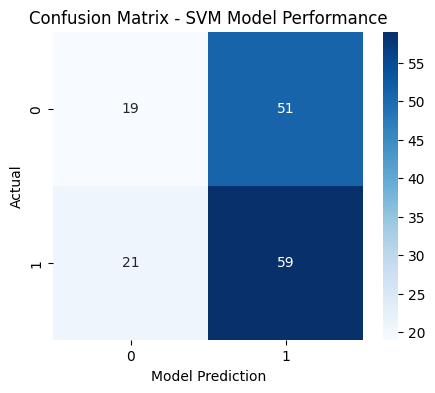

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

#Load & Persiapan Data
df = pd.read_csv(path + "/generative_ai_misinformation_dataset.csv")
df = df.dropna() # Hapus baris data yang kosong

# Pisahkan fitur (X) dan target (y)
target = 'is_misinformation'
y = df[target]
X = df.drop([target, 'id', 'post_id', 'timestamp', 'date', 'time', 'author_id', 'text'], axis=1) # Buang target & ID from fitur

#Encoding (Ubah Teks jadi Angka)
#Encoding Target (y)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# Ubah 'Blood Pressure' jadi 2 kolom angka
if 'Blood Pressure' in X.columns:
    X[['Systolic', 'Diastolic']] = X['Blood Pressure'].str.split('/', expand=True).astype(float)
    X = X.drop('Blood Pressure', axis=1)

# Encoding Fitur (X) using One-Hot Encoding (get_dummies)
X_encoded = pd.get_dummies(X, columns=['platform', 'month', 'weekday', 'country', 'city', 'timezone', 'model_signature', 'factcheck_verdict'], drop_first=True)


#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# --- 4. Split Data & Train SVM Model ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

model = SVC(kernel='rbf') # Create SVM model (you can change kernel='linear', 'poly', etc.)
model.fit(X_train, y_train) # Train the model

#Make Predictions
y_pred = model.predict(X_test)
print(f"SVM Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

#Create Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, # Show original class names
            yticklabels=le_y.classes_) # Show original class names

plt.title('Confusion Matrix - SVM Model Performance')
plt.xlabel('Model Prediction')
plt.ylabel('Actual')
plt.show()

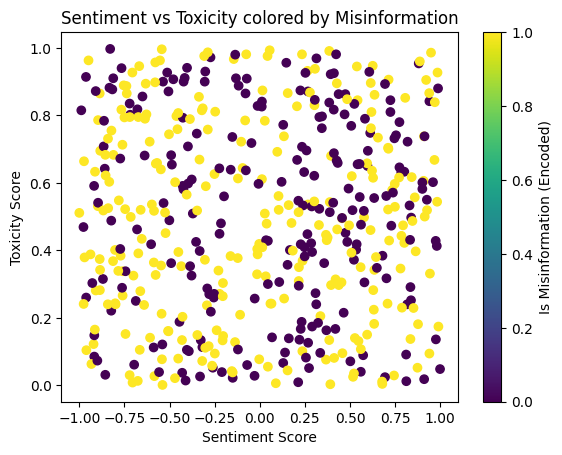

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Ensure df is the DataFrame loaded with generative_ai_misinformation_dataset.csv
# Assuming df is already loaded correctly in a previous cell
# df = pd.read_csv(path + "/generative_ai_misinformation_dataset.csv")

# Encode the 'is_misinformation' column for coloring
le = LabelEncoder()
df['is_misinformation_encoded'] = le.fit_transform(df['is_misinformation'])

plt.scatter(df['sentiment_score'], df['toxicity_score'], c=df['is_misinformation_encoded'], cmap='viridis')
plt.xlabel('Sentiment Score')
plt.ylabel('Toxicity Score')
plt.title('Sentiment vs Toxicity colored by Misinformation')
plt.colorbar(label='Is Misinformation (Encoded)')
plt.show()

/tmp/ipython-input-2649197418.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', num_classes)


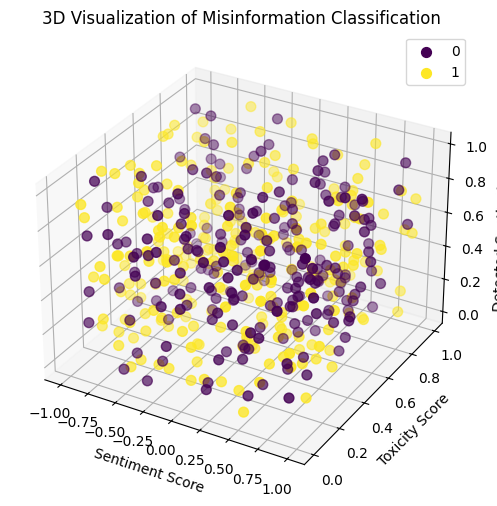

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df is the DataFrame loaded with generative_ai_misinformation_dataset.csv
# Assuming df is already loaded correctly in a previous cell
# df = pd.read_csv(path + "/generative_ai_misinformation_dataset.csv")

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['is_misinformation_encoded'] = le.fit_transform(df['is_misinformation'])

#Plot 3D results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
num_classes = len(le.classes_)
colors = plt.cm.get_cmap('viridis', num_classes)
labels = le.classes_

# Plot each class with a different color
for i, label in enumerate(labels):
  subset = df [df['is_misinformation_encoded'] == i]
  ax.scatter(
    subset['sentiment_score'],
    subset['toxicity_score'],
    subset['detected_synthetic_score'],
    color=colors(i),
    label=label,
    s = 50
  )
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Toxicity Score')
ax.set_zlabel('Detected Synthetic Score')
ax.set_title('3D Visualization of Misinformation Classification')
ax.legend()
plt.show()